# [SWCON25301] Machine Learning
Teaching Assistant: Suyong Bahk (clapd10@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P2:  NumPy를 이용한 Perceptron 구현 (10점)

### 학습목표
- Perceptron Python class를 직접 구현하면서 NN의 작동방법을 이해한다.
- 머신러닝 모델의 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해하고 설명 할 수 있다.

### 실습내용
Frank Rosenblatt의 classic perceptron binary classication(0 또는 1을 구분하는)을 구현합니다. <br>

실습은 다음 순서로 진행됩니다. 학생분들께서는 **<구현>**과 **<작성>**에 해당하는 부분을 수행해주시면 됩니다.

- S1. Perceptron 구현 및 분석
    - 1) 실습에서 사용되는 패키지 import
    - 2) 주어진 데이터셋 loading
    - 3) Perceptron Model 구현 **<구현>**
    - 4) Perceptron Model 학습
    - 5) Perceptron Model 검증
    - 6) Decision Boundary 시각화

<br>

- S2. Discussion **<작성>**

### 점수
- Perceptron model 구현: 각 함수별로 2점


### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## S1.  Perceptron 구현 및 분석

## 1-1) Imports
**수정하지 마세요.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1-2) Loading the Dataset
**수정하지 마세요.** 

코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

두 개의 class(0, 1)를 갖는 2차원 데이터이며, class0은 -1의 값을 가지고 class1은 1의 값을 가집니다.

In [2]:
# CSV 파일을 읽기
X, y = [], []

with open("./dataset.csv", "r") as f:
    next(f)
    classes = [-1, 1]
    for line in f:
        line = line.strip()
        if line:
            values = line.split(",")
        else:
            continue
        X.append([float(i) for i in values[:2]])
        #         y.append(int(values[-1])
        y.append(classes[int(values[-1])])

print(len(X), len(y))
print(y)


100 100
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Dataset Split & Visualization

**수정하지 마세요.** 

Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

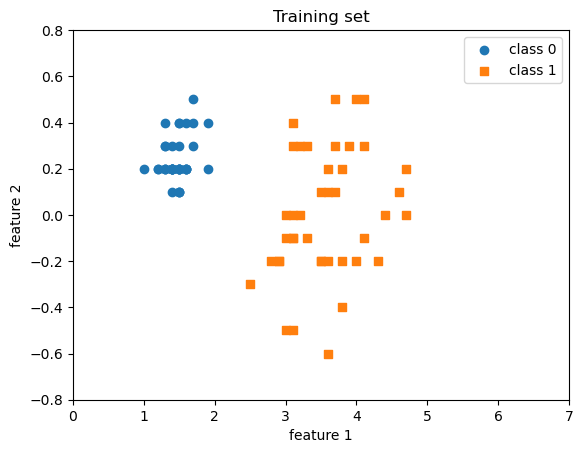

In [4]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter(
    [i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1],
    [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
    label="class 0",
    marker="o",
)

plt.scatter(
    [i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
    [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
    label="class 1",
    marker="s",
)

plt.title("Training set")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 1-3) Perceptron model 구현
이 부분에서는 직접 `Perceptron model`을 구현해 봅니다.

Perceptron model은 생성자, forward, backward, train, evaluation 다섯개 함수로 이루어져 있습니다.
- `__init__` 생성자에서는 Perceptron의 weights와 bias를 초기화합니다.
- `forward`에서는 input을 Perceptron의 가중치를 이용해서 예측을 수행합니다.
- `backward`에서는 Perceptron의 가중치를 학습하기 위한 gradient를 계산합니다.
- `train`에서는 Perceptron을 학습하는 과정으로 `forward`와 `backward`를 차례로 반복하여 Perceptron의 가중치를 업데이트 합니다.
- `evaluation`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다. **(주의: Accuracy 계산)**

아래 `# <your code>` 부분을 채워 넣어서 Perceptron class를 직접 작성하여 구현하세요.

**세부 구현 사항:**
- weights는 랜덤으로 초기화, bias는 0으로 초기화한다.
- activation function은 입력값을 기준으로 `0 초과는 1, 0 이하는 -1`을 출력하게 한다.
- 주의: <U>**Cost Function은 MSE 또는 Cross-Entropy가 아닌 $J(w) = -y(w^Tx)$를 사용**</U>한다. , $x\in Y$는 **틀린 샘플의 집합** 

#### Perceptron
![Perceptron](https://www.researchgate.net/profile/Daniel-Alvarez-34/publication/315788933/figure/fig3/AS:479799241121795@1491404461957/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the.png)
출처: https://www.researchgate.net/figure/Scheme-of-a-perceptron-A-nonlinear-activation-function-BULLET-is-applied-to-the_fig3_315788933

In [5]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.1, batch_size=1):
        self.batch_size = batch_size
        self.weights = np.random.rand(
            num_features,
        )
        self.bias = 0
        self.lr = learning_rate

    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]

    # 모델의 출력을 반환하는 함수
    def forward(self, x):
        # np.matmul을 이용하면 weight와 batched feature의 linear combination을 병렬적으로 계산할 수 있습니다.
        # 예를 들어, [배치 크기, weight 갯수]의 차원을 갖는 x와 [weight 갯수, 1] 차원을 갖는 weight의
        # linear combination을 구한다고 가정합시다.
        # 이 때, x와 weight의 행렬곱 np.matmul(x, weight)은 [배치 크기, 1] 차원 만큼의 linear combination이 됩니다.
        # linear_combinations = # <your code>
        linear_combinations = np.matmul(x, self.weights) + self.bias

        # Activation function을 np.where를 이용하여 구현할 수 있습니다.
        # np.where(statement, 배열 내 statement가 참인 부분의 출력, 배열 내 statement가 거짓인 부분의 출력)
        # pred = # <your code>
        pred = np.where(linear_combinations > 0, 1, -1)
        return pred

    def calc_loss_and_gradient(self, x, pred, label):
        # loss = # <your code>
        loss = -(label * (np.matmul(x, self.weights) + self.bias))
        # Hint : 스칼라 * 배열은 배열의 스칼라배를 반환합니다.
        # gradient_weight =  # <your code>
        gradient_weight = -label * x
        # gradient_bias =  # <your code>
        gradient_bias = -label

        return loss, gradient_weight, gradient_bias
        

    def update_parameters(self, gradient_weight, gradient_bias):
        
        # self.weights -=  # <your code>
        self.weights -= self.lr * gradient_weight
        # self.bias -=  # <your code>
        self.bias -= self.lr * gradient_bias

    def calc_accuracy(self, x, y):
        pred = self.forward(x)
        # 정답이면 True, 오답이면 False를 출력하는 array 생성
        correct_predictions = pred == y
        # True 갯수 계산
        counts_true = np.count_nonzero(correct_predictions)
        total_nums = np.size(pred)
        return counts_true / total_nums * 100

    def fit(self, x_train, y_train, epochs):
        x_arr = np.array(x_train)
        y_arr = np.array(y_train)

        # epochs 만큼 학습
        for e in range(epochs):
            x, y = self.shuffle_datasets(x_arr, y_arr)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size

            # batch size 크기의 배수가 아닌 나머지 training example 개수
            remain = len(x) % self.batch_size

            x = x[remain:]  # remain을 제외한 training example만 사용
            y = y[remain:]
            x = np.array_split(x, num_batches)  # 배치 크기씩 데이터 분할
            y = np.array_split(y, num_batches)

            # 각 배치마다 파라미터 업데이트
            for batch_x_y in zip(x, y):  # 배치 하나씩 학습
                batch_x, batch_y = batch_x_y

                pred = self.forward(batch_x)

                # 오답인 샘플만을 학습에 사용하기 위해, 정답이면 True, 오답이면 False를 출력하는 array 생성
                wrong_predictions = pred != batch_y
                num_wrong_predictions = np.count_nonzero(wrong_predictions)
                skip_this_batch = num_wrong_predictions == 0

                if skip_this_batch:
                    continue

                # 틀린 샘플들만 필터링
                pred = pred[wrong_predictions]
                batch_x = batch_x[wrong_predictions]
                batch_y = batch_y[wrong_predictions]

                for i in range(num_wrong_predictions):
                    loss, gradient_weight, gradient_bias = self.calc_loss_and_gradient(
                        batch_x[i], pred[i], batch_y[i]
                    )
                    # parameter update는 backward pass로도 불림
                    self.update_parameters(gradient_weight, gradient_bias)

            print(
                f"Epoch {e} train accuracy : {self.calc_accuracy(x_train, y_train):.2f}%"
            )
            if self.calc_accuracy(x_train, y_train) == 100:
                print("Stopped training.")
                break

**Q. 강의 내용과 연관지어 본인이 작성한 코드의 내용을 설명하세요. (미 작성시 과제 점수 감점)**  

(여기에 답안 작성)

np.matmul을 통해 x와 가중치의 행렬곱을 구해주었고, bias는 따로 더해주었습니다. 

np.where(linear_combinations > 0, 1, -1) statement가 참, 거짓이냐에 따라 참이면 1, 거짓이면 -1이 들어가도록 하였습니다.

loss = -(label * (np.matmul(x, self.weights) + self.bias))은 손실함수 𝐽(𝑤)=−𝑦(𝑤𝑇𝑥)를 그대로 작성한것으로 linear_combination값을 그대로 집어넣어 -y값 * 가중치 * x의 식을 통해 구현해주었습니다. 
gradient_weight 는 손실함수를 가중치에 대해 편미분한 값인데, 이게 -y*x로 표현될 수 있습니다. 같은 방식으로 gradient_bias는 -y가 나오게 됩니다. 

self.weights -= self.lr * gradient_weight
self.bias -= self.lr * gradient_bias 는 학습률 * 기울기를 곱해줌으로써 가중치와 편향을 업데이트해주는 코드입니다. 

## 1-4) Perceptron 학습

작성한 Perceptron을 Trainset을 이용해 **최대** 5 epoch 학습하고 학습된 weight, bias를 print합니다.

In [6]:
ppn = Perceptron(
    num_features=2, learning_rate=0.1, batch_size=4
)  # 위에서 구현한 Perceptron 모델 정의
ppn.fit(X_train, y_train, 5)  # 최대 5 epoch 학습

# 학습된 모델의 weight, bias 출력
print(ppn.weights)
print(ppn.bias)

Epoch 0 train accuracy : 98.75%
Epoch 1 train accuracy : 100.00%
Stopped training.
[ 0.48128013 -0.00874966]
-0.9999999999999999


## 1-5) 모델 평가
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [7]:
# Train dataset에서 성능 평가
train_acc = ppn.calc_accuracy(X_train, y_train)
print("Train set accuracy: %.2f%%" % (train_acc))

Train set accuracy: 100.00%


In [8]:
# Test dataset에서 성능 평가
test_acc = ppn.calc_accuracy(X_test, y_test)
print("Test set accuracy: %.2f%%" % (test_acc))

Test set accuracy: 100.00%


## 1-6) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

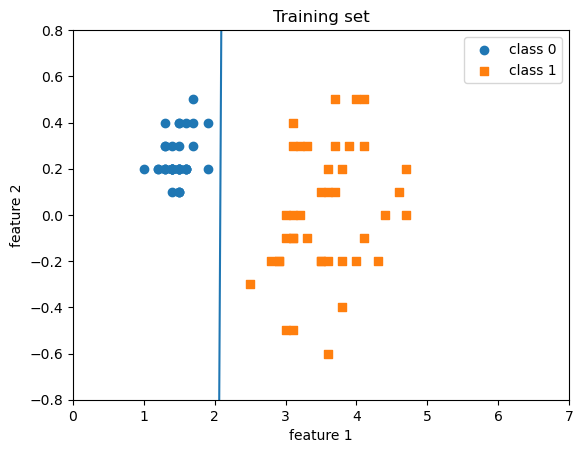

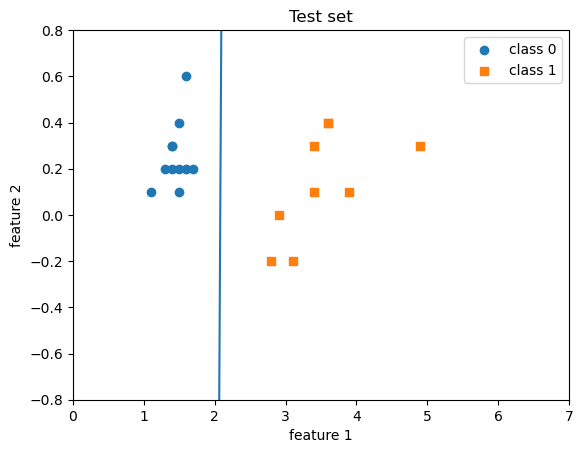

In [9]:
### Train 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter(
    [i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1],
    [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
    label="class 0",
    marker="o",
)
plt.scatter(
    [i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
    [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
    label="class 1",
    marker="s",
)
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot(
    [0, 7],
    [-ppn.bias / ppn.weights[1], -(7 * ppn.weights[0] + ppn.bias) / ppn.weights[1]],
)

# 그래프로 표현
plt.title("Training set")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

### Test 데이터셋에서 Decision Boundary 시각화
# 그래프로 표현
plt.scatter(
    [i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
    [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
    label="class 0",
    marker="o",
)

plt.scatter(
    [i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
    [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
    label="class 1",
    marker="s",
)
# Perscptron의 Weight와 Bias를 그래프로 표현
plt.plot(
    [0, 7],
    [-ppn.bias / ppn.weights[1], -(7 * ppn.weights[0] + ppn.bias) / ppn.weights[1]],
)

# 그래프로 표현
plt.title("Test set")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## S2. Discussion

**1) 예시에서 사용된 activat
ion 함수 이외의 어떤 함수가 있는지 찾아보고 설명해보세요.**

[답변작성]

시그모이드 함수 : 선의 기울기가 매끄럽기 때문에 계단함수보다 데이터를 잘 보존할 수 있다. 하지만 층이 많아질수록 기울기가 소실되어 가중치가 갱신되지 않을 수 있다. 

하이퍼볼릭 탄젠트 함수 : 시그모이드 함수의 중심의 y값이 0이 되도록 한 함수로, 시그모이드 함수와 마찬가지로 기울기 소실 문제가 있다. 

렐루 함수 : 입력값이 양수일때는 선형함수에 값을 대입하고, 아닐 경우 0을 출력하는 함수이다. 기울기 소실 문제가 발생하지 않음. 

**2) Perceptron 하나로 풀 수 없는 문제는 어떤것이 있는지 왜 그런지 설명해보세요.**

[답변작성]

퍼셉트론은 선형분류기이기 때문에 하나의 직선으로 분류할 수 없는 경우에는 문제를 풀 수가 없다. 
대표적으로 XOR문제가 있는데, 직선 두개로 결과를 분류할 수 있기 때문에 퍼셉트론이 두개가 된다면 풀 수 있지만 퍼셉트론 한개로는 풀 수 없다. 

---